# Word2Vec Assignment


- Sagun Rupakheti st123431

You MUST build on top of what we have coded in the class (to prevent anyone from just copying from the internet).

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

Submit as GitHub link.

**The solution starts from here--------**

**Embeddings are numerical representation i.e. a vector for words. The vectors try to capture the characteristics of the word which could be semantic or syntatic. Word2Vec is process of embedding used to group words together.** 

In [2]:
# Let's import some important libraries here
# FYI, all libraries are compiled here

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# import spacy
import re
import math 
import random

# 1. Load the Data

Let's load a corpus to start with the process of building models for Word2Vec. A corpus is a collection of authentic text or audio organized into datasets. In this notebook we use text data extracted from wikipedia on ChatGPT -> https://en.wikipedia.org/wiki/ChatGPT#:~:text=ChatGPT%20was%20fine,12%5D%5B13%5D 

In [3]:
with open ("data/data.txt", "r") as f:
    text = f.read()

In [4]:
text

"ChatGPT was fine-tuned on top of GPT-3.5 using supervised learning as well as reinforcement learning. [5] Both approaches used human trainers to improve the model's performance. In the case of supervised learning, the model was provided with conversations in which the trainers played both sides: the user and the AI assistant. In the reinforcement step, human trainers first ranked responses that the model had created in a previous conversation. These rankings were used to create 'reward models' that the model was further fine-tuned on using several iterations of Proximal Policy Optimization (PPO). [6][7] Proximal Policy Optimization algorithms present a cost-effective benefit to trust region policy optimization algorithms; they negate many of the computationally expensive operations with faster performance. [8][9] The models were trained in collaboration with Microsoft on their Azure supercomputing infrastructure."

In [5]:
# converting everything to be lower case 
text = text.lower()

In [6]:
# split the corpus into a list of strings with each sentence as a string
corpus = re.split(r"\. ", text)

In [7]:
corpus

['chatgpt was fine-tuned on top of gpt-3.5 using supervised learning as well as reinforcement learning',
 "[5] both approaches used human trainers to improve the model's performance",
 'in the case of supervised learning, the model was provided with conversations in which the trainers played both sides: the user and the ai assistant',
 'in the reinforcement step, human trainers first ranked responses that the model had created in a previous conversation',
 "these rankings were used to create 'reward models' that the model was further fine-tuned on using several iterations of proximal policy optimization (ppo)",
 '[6][7] proximal policy optimization algorithms present a cost-effective benefit to trust region policy optimization algorithms; they negate many of the computationally expensive operations with faster performance',
 '[8][9] the models were trained in collaboration with microsoft on their azure supercomputing infrastructure.']

### 1.1. Tokenization

In this section, we split the sentences into words and store everything in a list. This splitting is called tokenizing.


In [8]:
# tokenizing the corpus -> splitting all the words
flatten = lambda l:[item for sublist in l for item in sublist]
# flatten(corpus_tokenized)
corpus_tokenized = [sent.split(" ") for sent in corpus]
corpus_tokenized

[['chatgpt',
  'was',
  'fine-tuned',
  'on',
  'top',
  'of',
  'gpt-3.5',
  'using',
  'supervised',
  'learning',
  'as',
  'well',
  'as',
  'reinforcement',
  'learning'],
 ['[5]',
  'both',
  'approaches',
  'used',
  'human',
  'trainers',
  'to',
  'improve',
  'the',
  "model's",
  'performance'],
 ['in',
  'the',
  'case',
  'of',
  'supervised',
  'learning,',
  'the',
  'model',
  'was',
  'provided',
  'with',
  'conversations',
  'in',
  'which',
  'the',
  'trainers',
  'played',
  'both',
  'sides:',
  'the',
  'user',
  'and',
  'the',
  'ai',
  'assistant'],
 ['in',
  'the',
  'reinforcement',
  'step,',
  'human',
  'trainers',
  'first',
  'ranked',
  'responses',
  'that',
  'the',
  'model',
  'had',
  'created',
  'in',
  'a',
  'previous',
  'conversation'],
 ['these',
  'rankings',
  'were',
  'used',
  'to',
  'create',
  "'reward",
  "models'",
  'that',
  'the',
  'model',
  'was',
  'further',
  'fine-tuned',
  'on',
  'using',
  'several',
  'iterations',


In [9]:
# now we take the tokenized corpus and select only the unique words 
# store it into a list called vocabs
vocabs = list(set(flatten(corpus_tokenized)))
vocabs

['benefit',
 'previous',
 'responses',
 'with',
 'conversations',
 'trainers',
 'algorithms',
 'azure',
 'case',
 'further',
 'gpt-3.5',
 'faster',
 '[8][9]',
 'which',
 'both',
 'approaches',
 'the',
 'of',
 '[6][7]',
 'these',
 'many',
 'learning,',
 'several',
 'improve',
 'step,',
 'created',
 'human',
 "models'",
 'algorithms;',
 'provided',
 "model's",
 'were',
 'performance',
 'infrastructure.',
 'on',
 'rankings',
 'played',
 'collaboration',
 'as',
 'optimization',
 'models',
 'operations',
 'to',
 '(ppo)',
 'chatgpt',
 'reinforcement',
 'assistant',
 'microsoft',
 'expensive',
 'sides:',
 'supercomputing',
 'iterations',
 'they',
 'create',
 'supervised',
 'in',
 'proximal',
 'that',
 'model',
 'a',
 'fine-tuned',
 'ai',
 "'reward",
 'their',
 'policy',
 'top',
 'trained',
 'trust',
 'first',
 'used',
 'user',
 'region',
 'negate',
 'conversation',
 'was',
 'cost-effective',
 'ranked',
 'well',
 'present',
 'learning',
 '[5]',
 'had',
 'using',
 'and',
 'computationally']

### Numericalization
- Here, we index all the words in the vocabs
- Cause machine does not understand strings
- For things to make sense for the machine, numbers are required
- We will eventually add embeddings for all the indices

In [10]:

word2index = {v:idx for idx,v in enumerate(vocabs)}
word2index

{'benefit': 0,
 'previous': 1,
 'responses': 2,
 'with': 3,
 'conversations': 4,
 'trainers': 5,
 'algorithms': 6,
 'azure': 7,
 'case': 8,
 'further': 9,
 'gpt-3.5': 10,
 'faster': 11,
 '[8][9]': 12,
 'which': 13,
 'both': 14,
 'approaches': 15,
 'the': 16,
 'of': 17,
 '[6][7]': 18,
 'these': 19,
 'many': 20,
 'learning,': 21,
 'several': 22,
 'improve': 23,
 'step,': 24,
 'created': 25,
 'human': 26,
 "models'": 27,
 'algorithms;': 28,
 'provided': 29,
 "model's": 30,
 'were': 31,
 'performance': 32,
 'infrastructure.': 33,
 'on': 34,
 'rankings': 35,
 'played': 36,
 'collaboration': 37,
 'as': 38,
 'optimization': 39,
 'models': 40,
 'operations': 41,
 'to': 42,
 '(ppo)': 43,
 'chatgpt': 44,
 'reinforcement': 45,
 'assistant': 46,
 'microsoft': 47,
 'expensive': 48,
 'sides:': 49,
 'supercomputing': 50,
 'iterations': 51,
 'they': 52,
 'create': 53,
 'supervised': 54,
 'in': 55,
 'proximal': 56,
 'that': 57,
 'model': 58,
 'a': 59,
 'fine-tuned': 60,
 'ai': 61,
 "'reward": 62,
 'the

We will add a new string called **UNK** to the vocab which will represent the words that are not in the scope of the corpus

In [11]:
word2index['<UNK>'] = 85

In [12]:
vocabs.append('<UNK>')

In [13]:
vocabs[85]

'<UNK>'

# 2. Prepare the Data + Model + Test Model + Training + Plot Embeddings
In this section, we use 3 methods for preparing the Data and for each methods, models are formulated<br>
**2.1 CBow**<br>
**2.2 Skipgram**<br>
**2.3 Skipgram with Negative Sampling**

### 2.1. CBow

The main intuition behind CBow is it used to predict the center word using the context words.

#### 2.1.1. Data Preparation

In [15]:
# a function that creates batches of words
# center and context words
# adding window size to the function to make it flexible

def cbow_random_batch(batch_size,corpus,window_size):
    cbow = []
    #for each corpus
    for sent in corpus_tokenized:
        #
        for i in range(window_size,len(sent)-window_size): #start from 2 to second last
            context_word = []
            # print(sent[i])
            center_word = word2index[sent[i]]
            for j in range(window_size):
                outside_word = [word2index[sent[i-j-1]],word2index[sent[i+j+1]]] #window_size adjustable
                #loop through the outside to get all the context words in one list context word
                for o in outside_word:
                    context_word.append(o)
                # append context and center word together
                #Here, the context word will hold a list of words and center word is a single word
                #cbow is a list of lists
                cbow.append([context_word,center_word])
    
#     same as before
    random_index = np.random.choice(range(len(cbow)),batch_size,replace=False)
    #appending some list of inputs and labels
    random_inputs, random_labels = [] , []
    for index in random_index:
        random_inputs.append([cbow[index][0]]) #center words, this will be as shape of (1,) -> (1,1) for modeling
        random_labels.append([cbow[index][1]])
    
#     returning the inputs and labels
    return np.array(random_inputs),np.array(random_labels)

In [16]:

batch_size=2
cbow_random_batch(batch_size, corpus_tokenized,2)

(array([[[16, 17, 55, 54]],
 
        [[68,  2,  5, 57]]]),
 array([[ 8],
        [76]]))

### 2.1.2. Model

In [17]:
class Cbow(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Cbow, self).__init__()
        self.embedding_center_word = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        # lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        lower_term_sum = torch.sum(torch.exp(lower_term))
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn
    

In [18]:
voc_size = len(vocabs)
emb_size=2
cbow_model = Cbow(voc_size,emb_size)

In [19]:
WINDOW_SIZE=2

input_cbow,label_cbow = cbow_random_batch(10,corpus,WINDOW_SIZE)
input_cbow,label_cbow,voc_size

(array([[[72, 17, 52, 16]],
 
        [[47, 63,  3,  7]],
 
        [[ 4, 13,  3, 16]],
 
        [[53, 27, 42, 57]],
 
        [[72, 17, 52, 16]],
 
        [[ 3, 34, 37, 63]],
 
        [[39, 52, 64, 72]],
 
        [[16, 74, 21, 29]],
 
        [[42, 16,  5, 30]],
 
        [[69, 53, 31, 62]]]),
 array([[20],
        [34],
        [55],
        [62],
        [20],
        [47],
        [28],
        [58],
        [23],
        [42]]),
 86)

In [62]:
# needs to be long cause all tokens are integers
input_tensor = torch.LongTensor(input_cbow)
label_tensor = torch.LongTensor(label_cbow)  #LongTensor basically means integer....

In [63]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 86])

In [65]:
 loss = cbow_model(input_tensor, label_tensor, all_vocabs)
#Error - batch2 must be a 3D tensor

### 2.2 Skigram

Here we create the random batch function
The function is as same as done in the tutorial session so much explanation has not been done

In [24]:
def skipgram_random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [25]:
input, label = skipgram_random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[51],
       [16],
       [34],
       [49],
       [83],
       [79],
       [68],
       [12],
       [23],
       [35]])


### 2.2.2. Model

In [26]:
voc_size = len(vocabs)
voc_size

86

In [27]:
#the model will accept three vectors - u_o, v_c, u_w
#u_o - vector for outside words
#v_c - vector for center word
#u_w - vectors of all vocabs

class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [28]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 86])

In [29]:
input, label = skipgram_random_batch(batch_size, corpus_tokenized)
input
# input #center word

array([[54],
       [39]])

In [30]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [31]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)  #LongTensor basically means integer....

In [32]:
loss = model(input_tensor, label_tensor, all_vocabs)


In [33]:
loss

tensor(5.1596, grad_fn=<NegBackward0>)

### 2.2.3 Training

In [36]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
skipgram_model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [37]:
# copied from Chaky's lecture notebook on skipgram with scratch

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [38]:
import time

# Training
num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    
    
    input_batch, target_batch = skipgram_random_batch(batch_size, corpus)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = skipgram_model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 4.744878 | time: 0m 1s
Epoch: 2000 | cost: 6.116297 | time: 0m 2s
Epoch: 3000 | cost: 4.925833 | time: 0m 3s
Epoch: 4000 | cost: 4.273641 | time: 0m 5s
Epoch: 5000 | cost: 4.504857 | time: 0m 6s


### 2.2.4. Plotting

In [41]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = skipgram_model.embedding_center_word(word)
    outside_embed = skipgram_model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

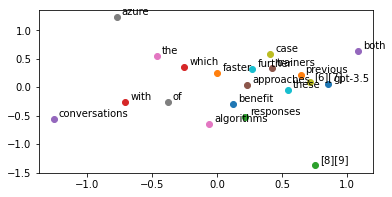

In [43]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

### 2.3 Negative sampling Skipgram

In [44]:
def negative_sampling_random_batch(batch_size, word_sequence):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1):
            target = word2index[sent[i]]
            context = [word2index[sent[i - 1]], word2index[sent[i + 1]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

In [45]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = negative_sampling_random_batch(batch_size, corpus)

print("Input: ",  input_batch)
print("Target: ", target_batch)

#we will convert them to tensor during training, so don't worry...

Input:  [[17]
 [78]]
Target:  [[56]
 [ 6]]


In [46]:
input_batch.shape, target_batch.shape


((2, 1), (2, 1))

## 2.3.1. Unigram Distribution

In [47]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])
word_count[',']

0

In [48]:
word_count[',']


0

In [49]:
num_total_words

132

In [50]:
Z = 0.001

unigram_table = []

for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [51]:
Counter(unigram_table)


Counter({'benefit': 25,
         'previous': 25,
         'responses': 25,
         'with': 58,
         'conversations': 25,
         'trainers': 58,
         'algorithms': 25,
         'azure': 25,
         'case': 25,
         'further': 25,
         'gpt-3.5': 25,
         'faster': 25,
         '[8][9]': 25,
         'which': 25,
         'both': 43,
         'approaches': 25,
         'the': 155,
         'of': 72,
         '[6][7]': 25,
         'these': 25,
         'many': 25,
         'learning,': 25,
         'several': 25,
         'improve': 25,
         'step,': 25,
         'created': 25,
         'human': 43,
         "models'": 25,
         'algorithms;': 25,
         'provided': 25,
         "model's": 25,
         'were': 43,
         'performance': 43,
         'infrastructure.': 25,
         'on': 58,
         'rankings': 25,
         'played': 25,
         'collaboration': 25,
         'as': 43,
         'optimization': 58,
         'models': 25,
         'operati

In [52]:

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [53]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [54]:
target_batch.shape


torch.Size([2, 1])

In [55]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)


tensor([[18, 14, 81],
        [32, 54, 58]])

## 2.3.2. Model

In [56]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

## 2.3.3. Training

In [57]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model_neg_skip          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [58]:
# using time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [59]:
import time

# Training
num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = negative_sampling_random_batch(batch_size, corpus)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model_neg_skip(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 6.815511 | time: 0m 1s
Epoch: 2000 | cost: 12.398777 | time: 0m 3s
Epoch: 3000 | cost: 8.263274 | time: 0m 4s
Epoch: 4000 | cost: 9.889107 | time: 0m 6s
Epoch: 5000 | cost: 14.295798 | time: 0m 7s


## Plotting


In [60]:

def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_neg_skip.embedding_v(id_tensor)
    u_embed = model_neg_skip.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

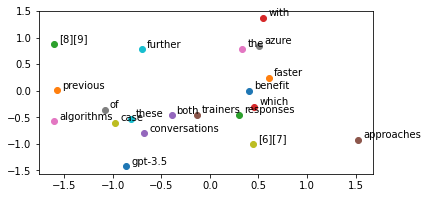

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()